<a href="https://colab.research.google.com/github/parasgupta1995/Almabetter-Capstone-project/blob/main/Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [370]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [371]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [372]:
# Telecom chrun and Region based Division of US state dataframe
df=pd.read_csv('/content/drive/MyDrive/Capstone project data/Python project/Telecom Churn.csv')

In [373]:
#Total call minutes within each customer 
df['calls minutes']=df.apply(lambda x: x['Total day minutes']+x['Total eve minutes']+x['Total night minutes']+x['Total intl minutes'],axis=1)

In [374]:
df['Total revenue']=df.apply(lambda x: x['Total day charge']+x['Total eve charge']+x['Total night charge']+x['Total intl charge'],axis=1)

In [375]:
#Number of calls by Customer in total
df['number of calls']=df.apply(lambda x:x['Total day calls']+x['Total eve calls']+x['Total night calls']+x['Total intl calls']+x['Customer service calls'],axis=1)

In [376]:
#Sorting values by State in Dataframes
df.sort_values(by='State',inplace=True,ignore_index=True)

In [377]:
#dataframe of selected useful data only for calculating number of calls
Number_of_calls_dataframe=df.loc[:,['State', 'Account length', 'International plan', 'Voice mail plan','Number vmail messages', 'Total day calls', 'Total eve calls','Total night calls','Total intl calls', 'Customer service calls']]

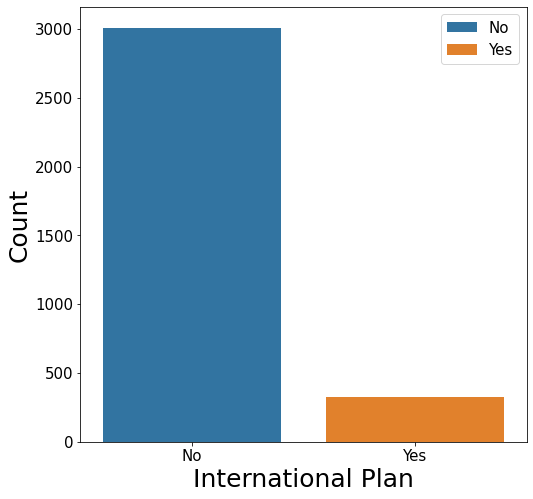

In [378]:
#People with no international plan and still making international calls can be potential customer for International plan
no_intl_plan_making_intlcalls=Number_of_calls_dataframe.groupby(by='International plan')['State'].count().reset_index()
plt.figure(figsize=(8,8))
sns.barplot(x='International plan',y='State',data=no_intl_plan_making_intlcalls,hue='International plan',dodge=False)
plt.xlabel("International Plan",size=25)
plt.xticks(size=15)
plt.ylabel("Count",size=25)
plt.yticks(size=15)
plt.legend(fontsize=15)

In [379]:
#Total number of call in each State
data_group=df.groupby('State').sum()[['Total day calls','Total eve calls','Total night calls']]


In [380]:
data_group.index[data_group["Total day calls"]==data_group["Total day calls"].max()].tolist()

['WV']

In [381]:
# State with Maximum number of call 
for j in data_group.columns:
  max_state=data_group.index[data_group["Total day calls"]==data_group["Total day calls"].max()].tolist()
  min_state=data_group.index[data_group["Total day calls"]==data_group["Total day calls"].min()].tolist()
  print(f'{max_state[0]} state maximum number of {j}')
  print(f'{min_state[0]} state minimum number of {j}')
   




WV state maximum number of Total day calls
CA state minimum number of Total day calls
WV state maximum number of Total eve calls
CA state minimum number of Total eve calls
WV state maximum number of Total night calls
CA state minimum number of Total night calls


In [382]:
series_number_of_calls=df.groupby('State').sum().reset_index()[['State','number of calls']].sort_values(by='State').reset_index()

In [383]:
#Grouped Data(by="State") number of calls made based on day,evening, night, international,service support 
number_of_call_timewise=Number_of_calls_dataframe.groupby(by='State').sum()[['Total day calls', 'Total eve calls','Total night calls','Total intl calls', 'Customer service calls']].sort_values(by='State').reset_index()

In [384]:
#Call number based on Region 
calls_regionwise=number_of_call_timewise.set_index('State')
calls_regionwise

,Total day calls,Total eve calls,Total night calls,Total intl calls,Customer service calls
State,,,,,
AK,4954,5022,5062,250,81
AL,7928,7877,7889,376,125
AR,5618,5381,5448,258,109
AZ,6407,6554,6399,311,102
CA,3553,3505,3373,151,50
CO,6278,6479,6406,271,118
CT,7284,7335,7569,304,112
DC,5409,5507,5274,211,73
DE,6017,5939,6174,262,99


In [385]:
#Total number of day,evening,night,International,service calls Regionwise
Total_number_of_calls=calls_regionwise.groupby(by='State').sum()
Total_number_of_calls.reset_index(inplace=True)
Total_number_of_calls.sort_values(by='Customer service calls',inplace=True)

In [386]:
size_of=(Total_number_of_calls.shape)

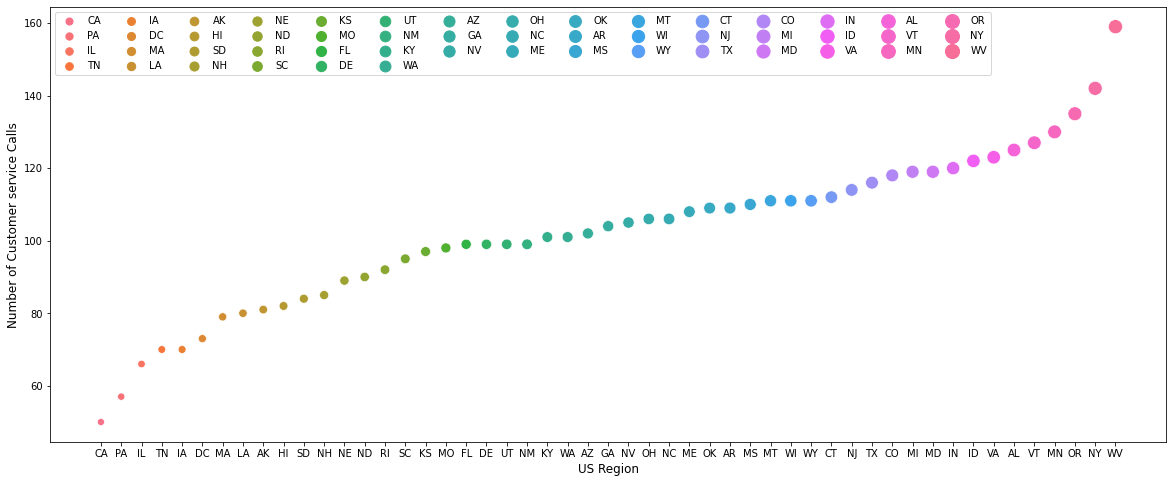

In [387]:
plt.rcParams['figure.figsize']=(20,8)
data1=Total_number_of_calls[['State','Customer service calls']]
sns.scatterplot(x='State',y='Customer service calls',data=data1,hue='State',size='State',sizes=(200,50))
plt.xlabel('US Region',fontsize=12)
plt.ylabel('Number of Customer service Calls',fontsize=12)
plt.legend(ncol=15,fontsize=10)

In [388]:
#List of State
state_list=list(df['State'].sort_values().unique())
print(state_list)

['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']


In [389]:
#Dataframe of deactivated account id
data_for_stop_id=df[df['Churn']==True][['State','Account length','Area code','Customer service calls','Churn']].groupby(by='State')


In [390]:
#list of number of stop using service statewise
list_Account_id_stop=[]
for i in state_list:
  a=list(data_for_stop_id.get_group(i)['Account length'])
  list_Account_id_stop.append(a)
dictionary_state_stop_id=dict(zip(state_list,list_Account_id_stop))
print(dictionary_state_stop_id)

{'AK': [126, 111, 177], 'AL': [197, 55, 93, 86, 60, 89, 172, 25], 'AR': [118, 115, 127, 54, 76, 107, 145, 99, 109, 98, 113], 'AZ': [66, 113, 109, 12], 'CA': [84, 112, 151, 103, 111, 37, 138, 79, 105], 'CO': [130, 159, 121, 105, 154, 121, 92, 132, 77], 'CT': [120, 119, 77, 125, 56, 93, 23, 87, 115, 160, 64, 96], 'DC': [114, 82, 60, 24, 66], 'DE': [113, 129, 224, 2, 122, 67, 138, 97, 51], 'FL': [55, 166, 127, 144, 100, 105, 132, 70], 'GA': [76, 93, 132, 44, 89, 117, 128, 122], 'HI': [105, 99, 108], 'IA': [81, 40, 44], 'ID': [130, 78, 103, 82, 77, 193, 119, 116, 92], 'IL': [89, 68, 78, 71, 137], 'IN': [117, 65, 94, 115, 122, 129, 68, 113, 72], 'KS': [167, 110, 24, 126, 46, 91, 47, 170, 84, 92, 105, 110, 94], 'KY': [98, 21, 39, 113, 58, 74, 91, 75], 'LA': [150, 124, 109, 155], 'MA': [40, 111, 127, 98, 119, 17, 71, 88, 62, 34, 136], 'MD': [135, 76, 61, 111, 93, 108, 136, 133, 119, 172, 154, 62, 93, 116, 88, 107, 147], 'ME': [62, 100, 75, 23, 92, 88, 80, 36, 97, 102, 118, 56, 131], 'MI': [22

In [391]:
#Number of Customer in each State
number_of_customer_each_state=df[['State']].value_counts().reset_index()
number_of_customer_each_state.rename(columns={0: "Number of customer"},inplace=True)

In [392]:
#Sort the dataframe of number of customer
number_of_customer_each_state.sort_values(by='State',inplace=True)

In [393]:
#Extraction of number chrun customer statewise list:
number_of_churn_statewise=[]
for i in list(df['State'].unique()):
  n=len(dictionary_state_stop_id.get(i))
  number_of_churn_statewise.append(n)
print(number_of_churn_statewise)

[3, 8, 11, 4, 9, 9, 12, 5, 9, 8, 8, 3, 3, 9, 5, 9, 13, 8, 4, 11, 17, 13, 16, 15, 7, 14, 14, 11, 6, 5, 9, 18, 6, 14, 15, 10, 9, 11, 8, 6, 14, 8, 5, 18, 10, 5, 8, 14, 7, 10, 9]


In [394]:
#Creating a dictionary for pandas dataframe of churn customer statewise
dataframe_churn = {"State":state_list, "Number of Churn": number_of_churn_statewise}

In [395]:
#churn customer dataframe
churn_data_statewise=pd.DataFrame(dataframe_churn)

In [396]:
#dataframe of number of customer and churn customer in a State
comparision_data_for_chrun=number_of_customer_each_state.set_index('State').join(churn_data_statewise.set_index('State'))

In [397]:
#index reseting
comparision_data_for_chrun.reset_index(level=0,inplace=True)
comparision_data_for_chrun.head()

,State,Number of customer,Number of Churn
0,AK,52,3
1,AL,80,8
2,AR,55,11
3,AZ,64,4
4,CA,34,9


In [398]:
# Joining comparision dataframe with df2 to get Region in the dataframe
comparision_data_for_chrun=comparision_data_for_chrun.sort_values(by='Number of Churn')

In [399]:
comparision_data_for_chrun['customer retention']=comparision_data_for_chrun.apply(lambda x:(1-x['Number of Churn']/x['Number of customer'])*100,axis=1)
comparision_data_for_chrun.sort_values(by='customer retention',inplace=True)

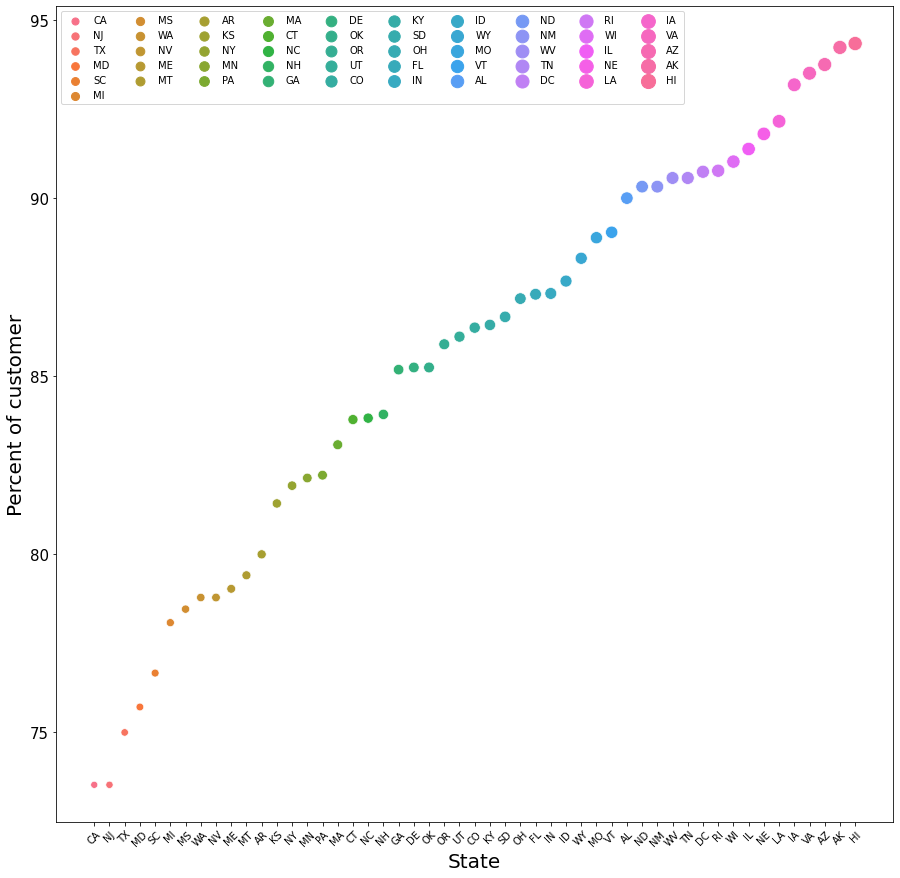

In [400]:
plt.figure(figsize=(15,15))
sns.scatterplot(x='State',y='customer retention',data=comparision_data_for_chrun,hue='State',size='State',sizes=(200,50))
plt.xticks(rotation=45)
plt.yticks(fontsize=15)
plt.xlabel(f"State",size=20)
plt.ylabel("Percent of customer",size=20)
plt.legend(ncol=10)

In [401]:
def charge_per_minute(arg1,arg2):
  if arg1==0 and arg2==0:
    minute_charge=int(0)
    return minute_charge
  else:
    minute_charge=arg1/arg2
    return minute_charge


In [402]:
#Average Price per minutes for day,eve,night,international calls
df['day charge per minute']=df.apply(lambda x: charge_per_minute(x['Total day charge'],x['Total day minutes']),axis=1)
df['eve charge per minute']=df.apply(lambda x: charge_per_minute(x['Total eve charge'],x['Total eve minutes']),axis=1)
df['night charge per minute']=df.apply(lambda x: charge_per_minute(x['Total night charge'],x['Total night minutes']),axis=1)
df['intl charge per minute']=df.apply(lambda x: charge_per_minute(x['Total intl charge'],x['Total intl minutes']),axis=1)

In [403]:
#Mean price per minutes across the Statewise 
series_mean_price=df.groupby(by="State")[['day charge per minute','eve charge per minute','night charge per minute','intl charge per minute']].mean()

In [404]:
p=df[df['Voice mail plan']=='Yes'][['State','Area code','Number vmail messages','Churn']].set_index('State')
q=p.groupby(by=['Area code','State'])['Number vmail messages',"Churn"].mean()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


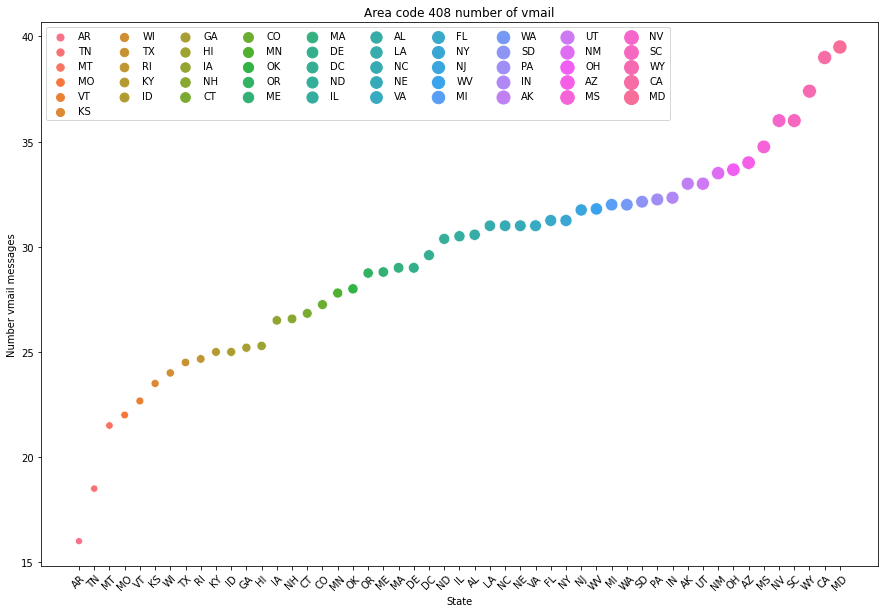

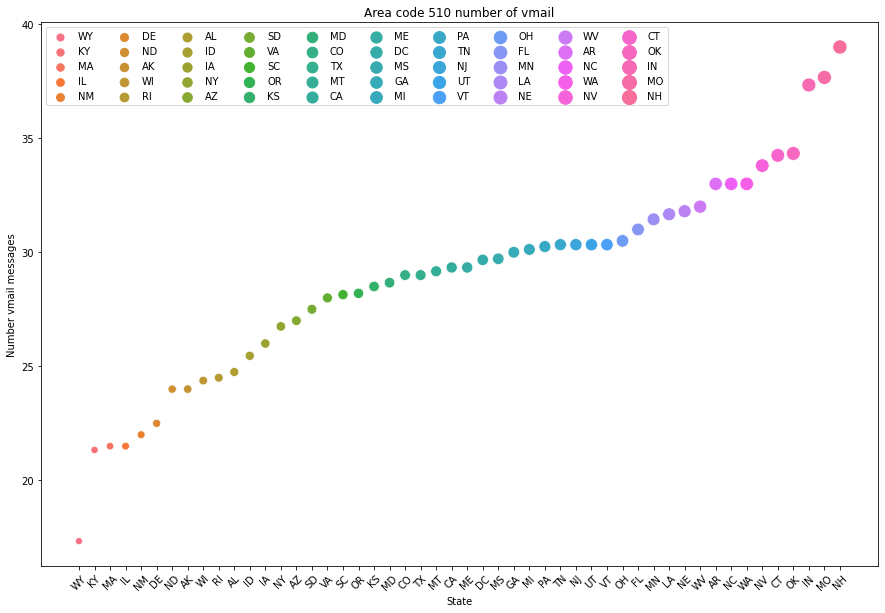

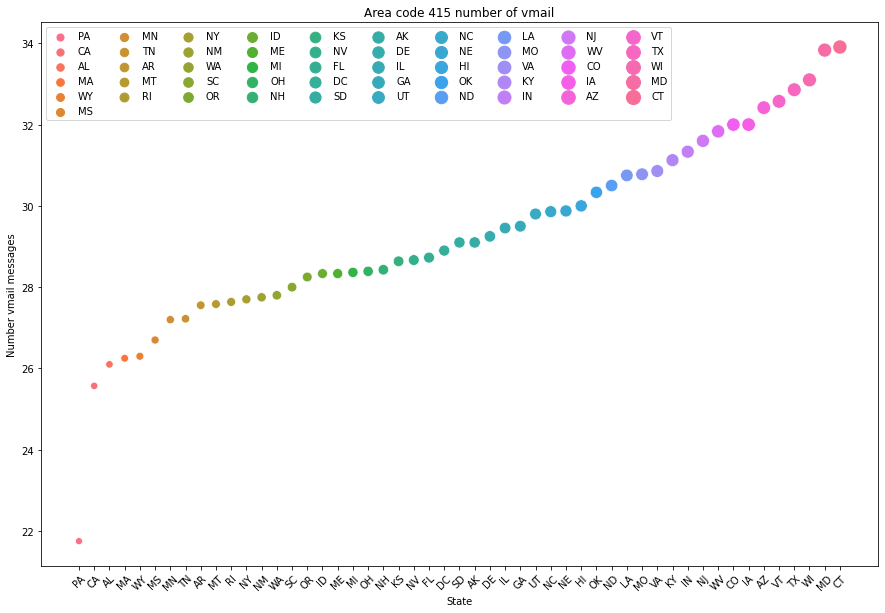

In [405]:
# data_scatter=pivoted[[408,415,510]] 

for i in [408, 510, 415]:
  pivoted_data=q.loc[i,:].sort_values("Number vmail messages")
  plt.figure(figsize=(15,10))
  sns.scatterplot(x="State", y='Number vmail messages',hue='State',data=pivoted_data,size='State',sizes=(200,50))
  plt.legend(bbox_to_anchor=(1,1))
  plt.title(f'Area code {i} number of vmail')
  plt.xticks(rotation=45)
  plt.legend(ncol=10)

In [406]:
data_for_mean=df[['Account length','State','Number vmail messages','day charge per minute','eve charge per minute','night charge per minute','intl charge per minute', 'calls minutes', 'Total revenue', 'number of calls']]

In [407]:
data_median=data_for_mean.groupby(by=["State"]).agg('mean')[['Account length','day charge per minute','eve charge per minute','night charge per minute','intl charge per minute', 'calls minutes', 'Total revenue', 'number of calls']]

In [408]:
data_median.sort_values(by='Account length',inplace=True)

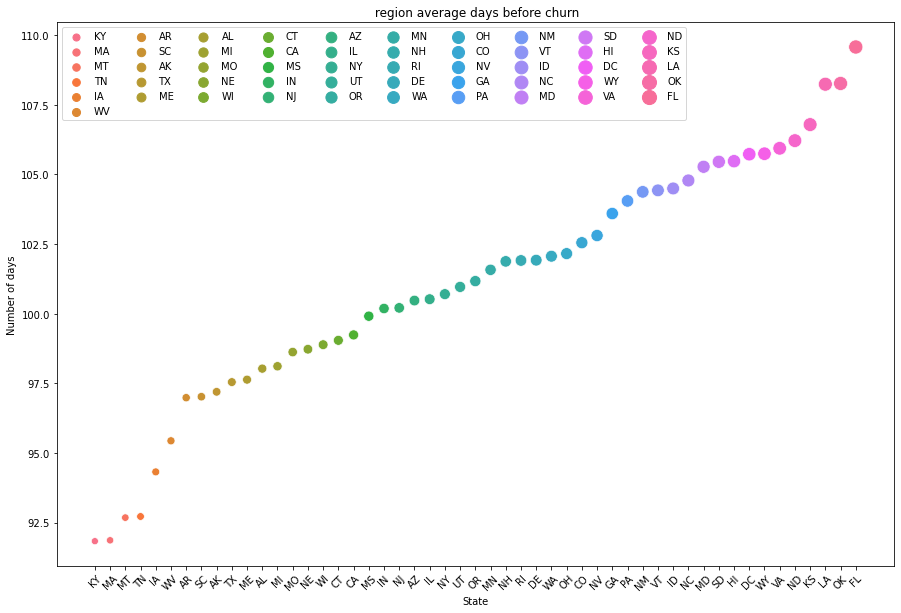

In [409]:
plot_data=data_median
# plt.subplot(n/2,n/2,j)
plt.figure(figsize=(15,10))
sns.scatterplot(x='State',y='Account length',data=plot_data,hue='State',size='State',sizes=(200,50))
plt.legend(bbox_to_anchor=(1,1))
plt.title(label=f' region average days before churn')
plt.ylabel("Number of days")
plt.tick_params(axis='x',rotation=45)
plt.legend(ncol=10)

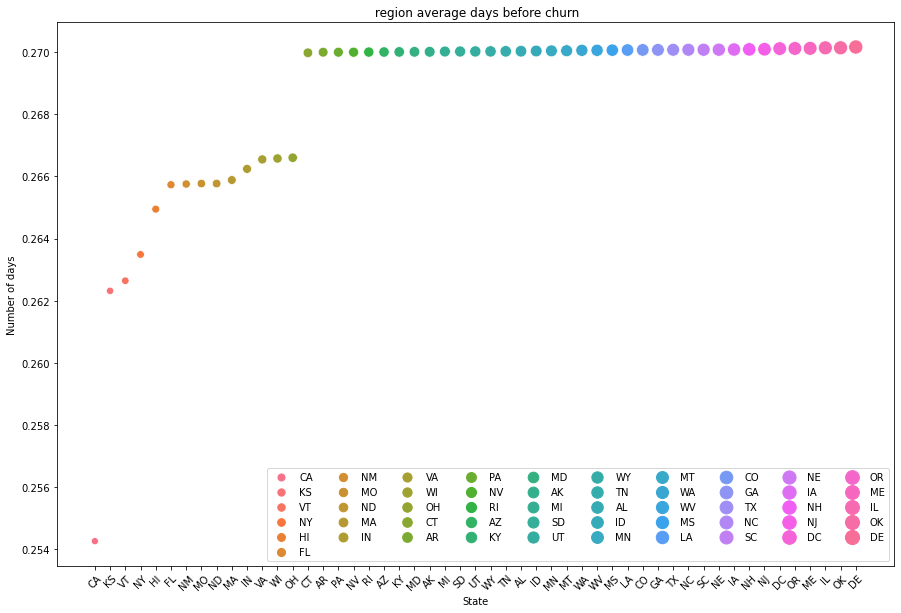

In [410]:
#Average International charge of the state
data_median.sort_values(by='intl charge per minute',inplace=True)
plot_data=data_median
# plt.subplot(n/2,n/2,j)
plt.figure(figsize=(15,10))
sns.scatterplot(x='State',y='intl charge per minute',data=plot_data,hue='State',size='State',sizes=(200,50))
plt.legend(bbox_to_anchor=(1,1))
plt.title(label=f' region average days before churn')
plt.ylabel("Number of days")
plt.tick_params(axis='x', rotation=45)
plt.legend(ncol=10)

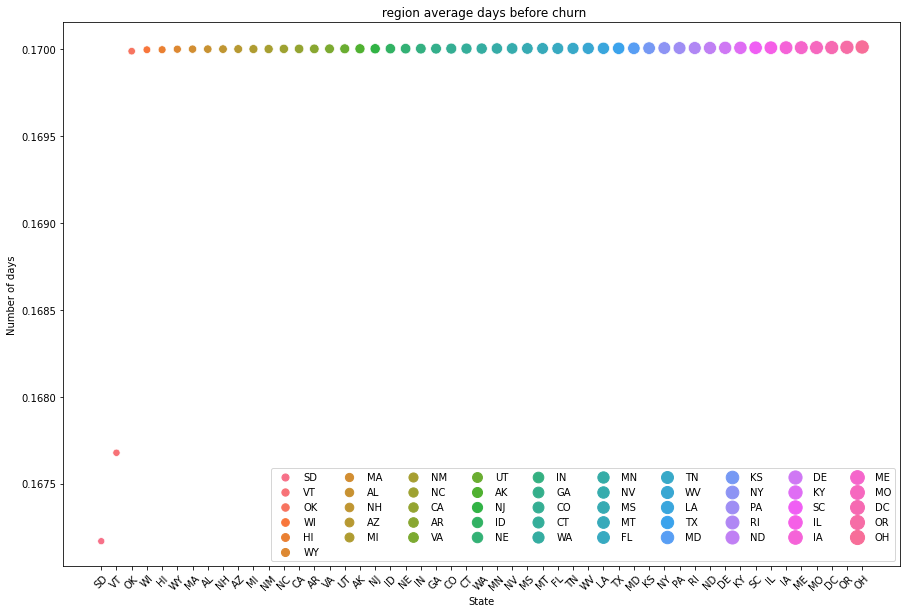

In [411]:
data_median.sort_values(by='day charge per minute',inplace=True)
plot_data=data_median
# plt.subplot(n/2,n/2,j)
plt.figure(figsize=(15,10))
sns.scatterplot(x='State',y='day charge per minute',data=plot_data,hue='State',size='State',sizes=(200,50))
plt.legend(bbox_to_anchor=(1,1))
plt.title(label=f' region average days before churn')
plt.ylabel("Number of days")
plt.tick_params(axis='x', rotation=45)
plt.legend(ncol=10)

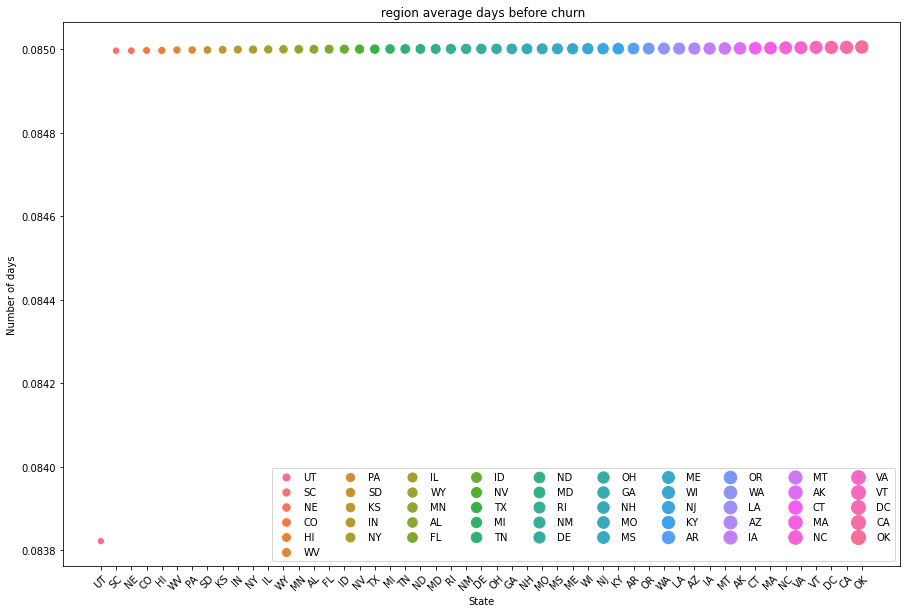

In [412]:
data_median.sort_values(by='eve charge per minute',inplace=True)
plot_data=data_median
# plt.subplot(n/2,n/2,j)
plt.figure(figsize=(15,10))
sns.scatterplot(x='State',y='eve charge per minute',data=plot_data,hue='State',size='State',sizes=(200,50))
plt.legend(bbox_to_anchor=(1,1))
plt.title(label=f' region average days before churn')
plt.ylabel("Number of days")
plt.tick_params(axis='x', rotation=45)
plt.legend(ncol=10)

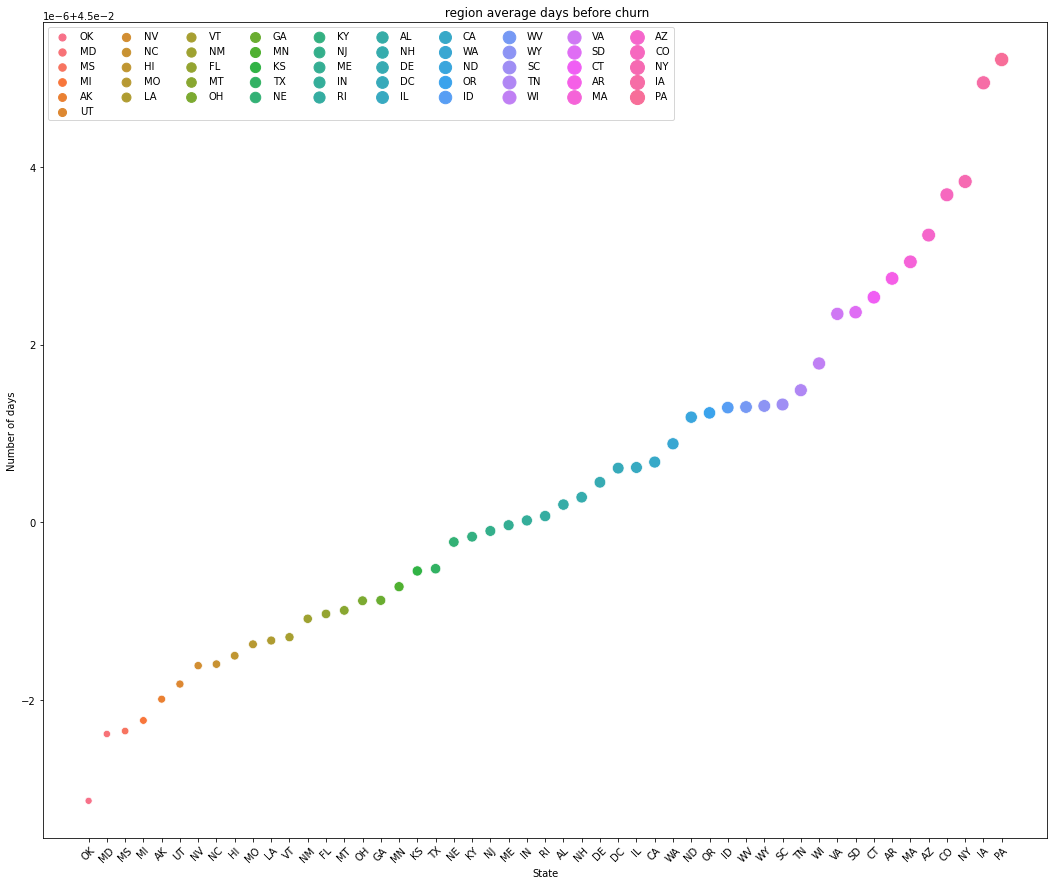

In [413]:
data_median.sort_values(by='night charge per minute',inplace=True)
plot_data=data_median
# plt.subplot(n/2,n/2,j)
plt.figure(figsize=(18,15))
sns.scatterplot(x='State',y='night charge per minute',data=plot_data,hue='State',size='State',sizes=(200,50))
plt.legend(bbox_to_anchor=(1,1))
plt.title(label=f' region average days before churn')
plt.ylabel("Number of days")
plt.tick_params(axis='x', rotation=45)
plt.legend(ncol=10)

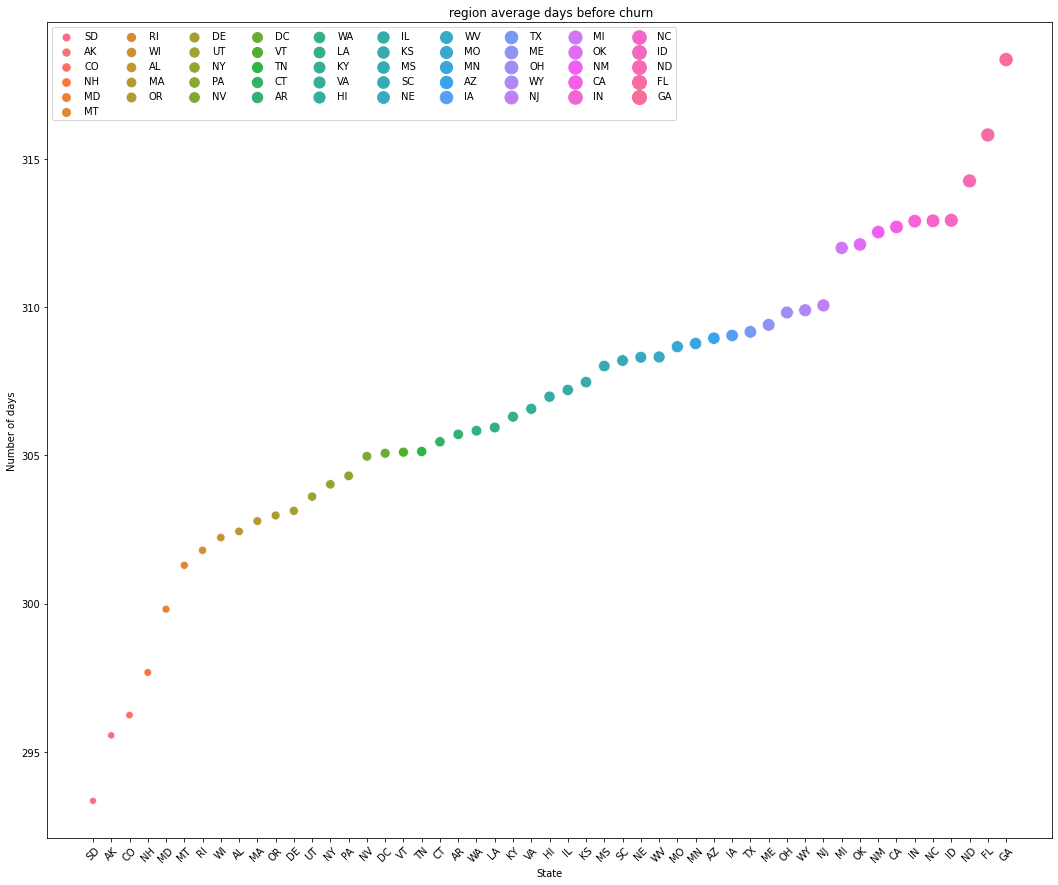

In [414]:
data_median.sort_values(by='number of calls',inplace=True)
plot_data=data_median
# plt.subplot(n/2,n/2,j)
plt.figure(figsize=(18,15))
sns.scatterplot(x='State',y='number of calls',data=plot_data,hue='State',size='State',sizes=(200,50))
plt.legend(bbox_to_anchor=(1,1))
plt.title(label=f' region average days before churn')
plt.ylabel("Number of days")
plt.tick_params(axis='x', rotation=45)
plt.legend(ncol=10)

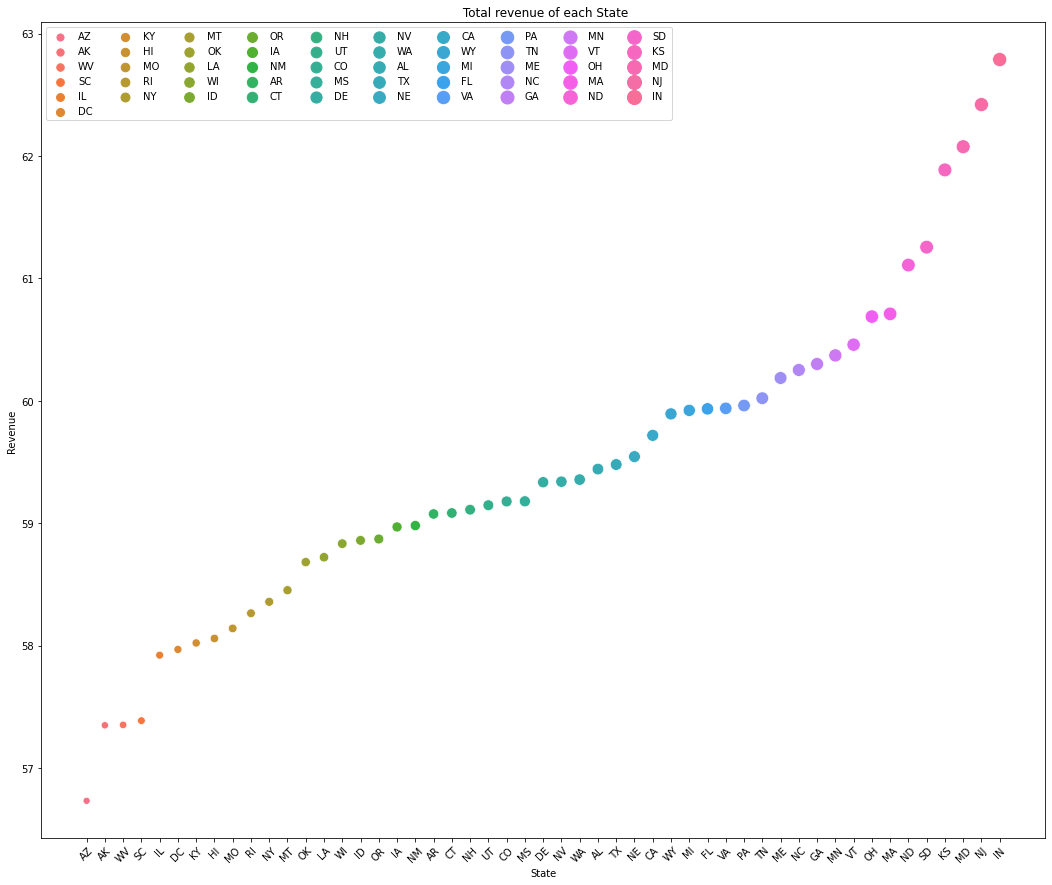

In [415]:
data_median.sort_values(by='Total revenue',inplace=True)
plot_data=data_median
# plt.subplot(n/2,n/2,j)
plt.figure(figsize=(18,15))
sns.scatterplot(x='State',y='Total revenue',data=plot_data,hue='State',size='State',sizes=(200,50))
plt.legend(bbox_to_anchor=(1,1))
plt.title(label=f' Total revenue of each State')
plt.ylabel("Revenue")
plt.tick_params(axis='x', rotation=45)
plt.legend(ncol=10)

In [416]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total intl charge,Customer service calls,Churn,calls minutes,Total revenue,number of calls,day charge per minute,eve charge per minute,night charge per minute,intl charge per minute
0,AK,126,415,No,No,0,58.2,94,9.89,138.7,...,3.21,5,True,345.6,31.05,309,0.169931,0.085004,0.045029,0.269748
1,AK,111,415,No,No,0,172.8,58,29.38,183.1,...,2.13,4,True,522.6,54.22,277,0.170023,0.084981,0.045025,0.269620
2,AK,71,510,No,No,0,185.0,84,31.45,232.5,...,4.02,3,False,623.5,63.83,302,0.170000,0.084989,0.045003,0.269799
3,AK,76,415,No,Yes,22,160.1,107,27.22,168.7,...,2.57,3,False,361.5,45.17,352,0.170019,0.085003,0.044828,0.270526
4,AK,101,510,No,No,0,174.9,105,29.73,262.0,...,2.30,1,False,655.4,63.75,279,0.169983,0.085000,0.045000,0.270588


In [436]:
df['customer complaint percent']=df.apply(lambda x: round((x['Customer service calls']/x['number of calls']*100),2),axis=1)

In [437]:
da=df[df['Churn']==True][['State','Churn','Customer service calls','number of calls','customer complaint percent','Total revenue','Total intl charge','Total night charge','Total day charge','Total eve charge']]
da.sort_values(by=['State'])

,State,Churn,Customer service calls,number of calls,customer complaint percent,Total revenue,Total intl charge,Total night charge,Total day charge,Total eve charge
0,AK,True,5,309,1.62,31.05,3.21,6.16,9.89,11.79
1,AK,True,4,277,1.44,54.22,2.13,7.15,29.38,15.56
30,AK,True,1,281,0.36,68.62,3.05,8.64,42.28,14.65
53,AL,True,5,300,1.67,52.07,3.70,7.83,21.64,18.90
54,AL,True,1,309,0.32,67.42,3.86,9.17,32.62,21.77
...,...,...,...,...,...,...,...,...,...,...
3289,WY,True,0,256,0.00,49.76,2.78,6.30,28.46,12.22
3299,WY,True,5,317,1.58,74.69,2.21,12.09,41.17,19.22
3304,WY,True,3,267,1.12,76.40,3.11,9.97,46.10,17.22
3306,WY,True,5,334,1.50,56.14,2.62,9.18,25.67,18.67


In [419]:
cond1=(da['complaint percent']>1)
cond2=(da['Total intl charge']>df['Total intl charge'].agg('mean'))
cond3=(da['Total revenue']>1.2*df['Total revenue'].agg('mean'))
cond4=(da['number of calls']<df['number of calls'].agg('mean'))
cond5=(da['Total day charge']>1.2*df['Total day charge'].agg('mean'))
cond6=(da['Total eve charge']>1.2*df['Total eve charge'].agg('mean'))
cond7=(da['Total night charge']>1.2*df['Total night charge'].agg('mean'))

In [420]:
da[cond1]['Churn'].count()

159

In [421]:
da[cond2]['Churn'].count()

269

In [422]:
da[cond3]['Churn'].count()

216

In [423]:
da[cond4]['Churn'].count()

233

In [424]:
da[cond5]['Churn'].count()

246

In [425]:
da[cond6]['Churn'].count()

143

In [426]:
da[cond7]['Churn'].count()

116

In [427]:
da[cond1 & cond2 & cond3 & cond4 ]['Churn'].count()

9

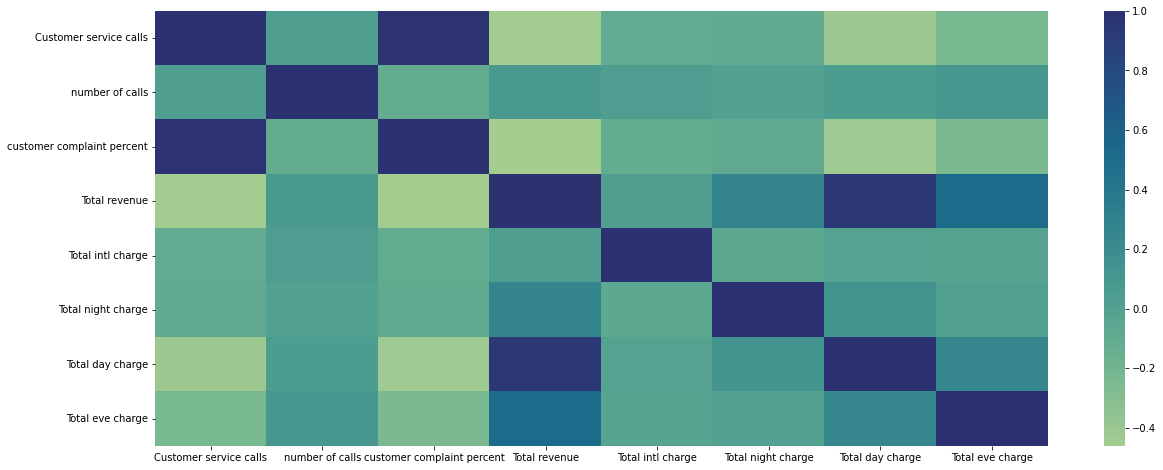

In [449]:
heat_data=df[df['Churn']==True][['Customer service calls','number of calls','customer complaint percent','Total revenue','Total intl charge','Total night charge','Total day charge','Total eve charge']]
heatmap_corr=a.corr()
sns.heatmap(heatmap_corr,cmap="crest")

